# **Final Project: Heart Disease Prediction**
## **Introduction**
Heart disease is a major cause of mortality worldwide, and early diagnosis can help improve treatment and patient outcomes. This project aims to build a **predictive model** that can classify whether a patient has heart disease based on various health indicators.

---

## **1. Research Question**
**Can we develop a predictive model to classify whether a patient has heart disease based on their health indicators?**

To answer this, we will:
- Perform **exploratory data analysis (EDA)** to understand the dataset.
- Apply **feature selection** techniques to identify key predictors.
- Train **machine learning models** to classify patients.
- Evaluate model performance using **ROC-AUC, accuracy, precision, and recall**.

---

In [219]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [221]:
# Import the data from Kaggle using the API
import kaggle
kaggle.api.dataset_download_files("johnsmith88/heart-disease-dataset", path=".", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


# Heart Disease Dataset - Attribute Reference

| **Attribute**                                    | **Description** |
|--------------------------------------------------|---------------|
| **Age**                                         | Age in years |
| **Sex**                                         | 1 = Male, 0 = Female |
| **Chest Pain Type**                              | (1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic) |
| **Resting Blood Pressure**                      | Blood pressure in mm Hg |
| **Serum Cholesterol (mg/dl)**                    | Cholesterol level in mg/dl |
| **Fasting Blood Sugar**                          | 1 = Fasting blood sugar > 120 mg/dl, 0 = Otherwise |
| **Resting ECG Results**                         | (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy) |
| **Maximum Heart Rate Achieved**                 | Highest heart rate during exercise |
| **Exercise Induced Angina**                      | 1 = Yes, 0 = No |
| **Oldpeak (ST Depression)**                      | ST depression induced by exercise relative to rest |
| **Slope of Peak Exercise ST Segment**           | (1 = Upsloping, 2 = Flat, 3 = Downsloping) |
| **Number of Major Vessels Colored by Fluoroscopy** | (0-3) |
| **Thalassemia (Thal)**                          | 0 = Normal, 1 = Fixed defect, 2 = Reversible defect |


## **Exploratory Analysis**  
Before building our predictive model, we analyze the dataset to understand its structure, detect missing values, and identify key patterns.


In [132]:
# Loading the dataset
data = pd.read_csv('./heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [122]:
data.describe().round(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.4,0.7,0.9,131.6,246.0,0.1,0.5,149.1,0.3,1.1,1.4,0.8,2.3,0.5
std,9.1,0.5,1.0,17.5,51.6,0.4,0.5,23.0,0.5,1.2,0.6,1.0,0.6,0.5
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


In [153]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **Research Question**
**Can we develop a predictive model to classify whether a patient has heart disease based on their health indicators?**

### **Approach:**
2. **Select important features** using statistical methods and machine learning techniques.
3. **Train and evaluate classification models** to predict heart disease.
4. **Compare model performance** using accuracy, precision, recall, and ROC-AUC.
5. **Visualize results** to interpret model effectiveness and key risk factors.

### **Expected Outcome:**
- Identify which health indicators most strongly correlate with heart disease.
- Develop a machine learning model that can assist in early diagnosis.
- Assess the model’s ability to generalize to unseen data.


In [160]:
data['age_group'] = pd.cut(data['age'],bins = [0, 21, 40, 55, 80], labels=['Young', 'Adults', 'Middle-aged', 'Senior'])

In [162]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle-aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle-aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Senior
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Senior
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Middle-aged
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Middle-aged


### Correlation Matrix Heatmap

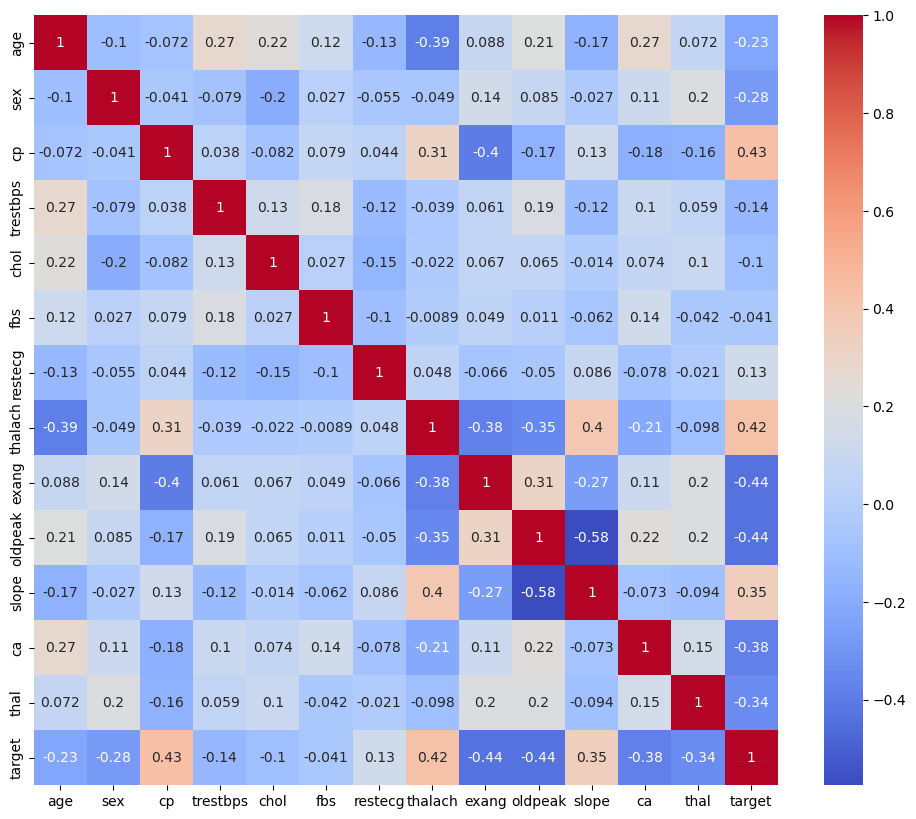

In [180]:
numeric_data = data.select_dtypes(include=['number'])  # Filter numeric data only
plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## **Feature Selection using SelectKBest**
To improve model efficiency, we select the **top 8 most relevant features** using **ANOVA F-test (f_classif)**.


In [187]:
from sklearn.feature_selection import SelectKBest, f_classif
X = numeric_data.drop('target', axis=1)
y = numeric_data['target']
selector = SelectKBest(f_classif, k=8)  # select top 8 features
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


## **Feature Selection using Recursive Feature Elimination (RFE)**
To refine our model, we use **Recursive Feature Elimination (RFE)** with **Logistic Regression** to select the **top 8 most significant features**.

### **Methodology:**
1. **Standardize Features:**
   - We apply **StandardScaler** to normalize the feature values, improving model convergence.
   
2. **Use RFE for Feature Selection:**
   - Train a **Logistic Regression** model.
   - Iteratively remove the least important features until only **8 key features** remain.

3. **Retrieve Selected Features:**
   - Extract and display the most relevant predictors.

In [191]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose a solver that might converge better if needed
model = LogisticRegression(max_iter=2000, solver='lbfgs')

# Perform RFE to select top 8 features
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_scaled, y)
selected_rfe = X.columns[rfe.support_]
print("RFE Selected features:", selected_rfe)


RFE Selected features: Index(['sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [193]:
from sklearn.model_selection import train_test_split

# Select features based on RFE results
X_selected = X[selected_rfe]
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

## **Model Evaluation**
We assess the model's performance using key classification metrics.

### **Metrics Used:**
- **Accuracy:** Overall correctness of predictions.
- **Classification Report:** Precision, recall, and F1-score for each class.
- **Confusion Matrix:** Breakdown of correct vs. incorrect predictions.
- **ROC-AUC Score:** Measures the model's ability to distinguish between classes.


In [195]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8344155844155844
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       159
           1       0.78      0.92      0.84       149

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.85      0.83      0.83       308

Confusion Matrix:
 [[120  39]
 [ 12 137]]
ROC-AUC: 0.9031277700392555


## **Hyperparameter Tuning with GridSearchCV**
To improve model performance, we tune hyperparameters using **GridSearchCV**.

### **Why Grid Search?**
- Tests multiple hyperparameter values.
- Uses **cross-validation** to ensure generalization.
- Selects the best combination automatically.



In [197]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=2000, solver='lbfgs'),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 10}
Best cross-validation score: 0.841006216006216


## **Data Visualization**
To assess model performance and gain insights into feature importance, we visualize key metrics.

### **1. ROC Curve**
- Displays the model's ability to distinguish between classes.
- Higher **AUC (Area Under Curve)** values indicate better performance.

### **2. Confusion Matrix**
- Shows correct and incorrect predictions.
- Helps analyze model misclassifications.

### **3. Feature Importance**
- Highlights the most influential features in predictions.
- Useful for understanding which health indicators matter most.

### **4. Age Distribution**
- Visualizes the spread of patient ages in the dataset.
- Identifies trends in the population.


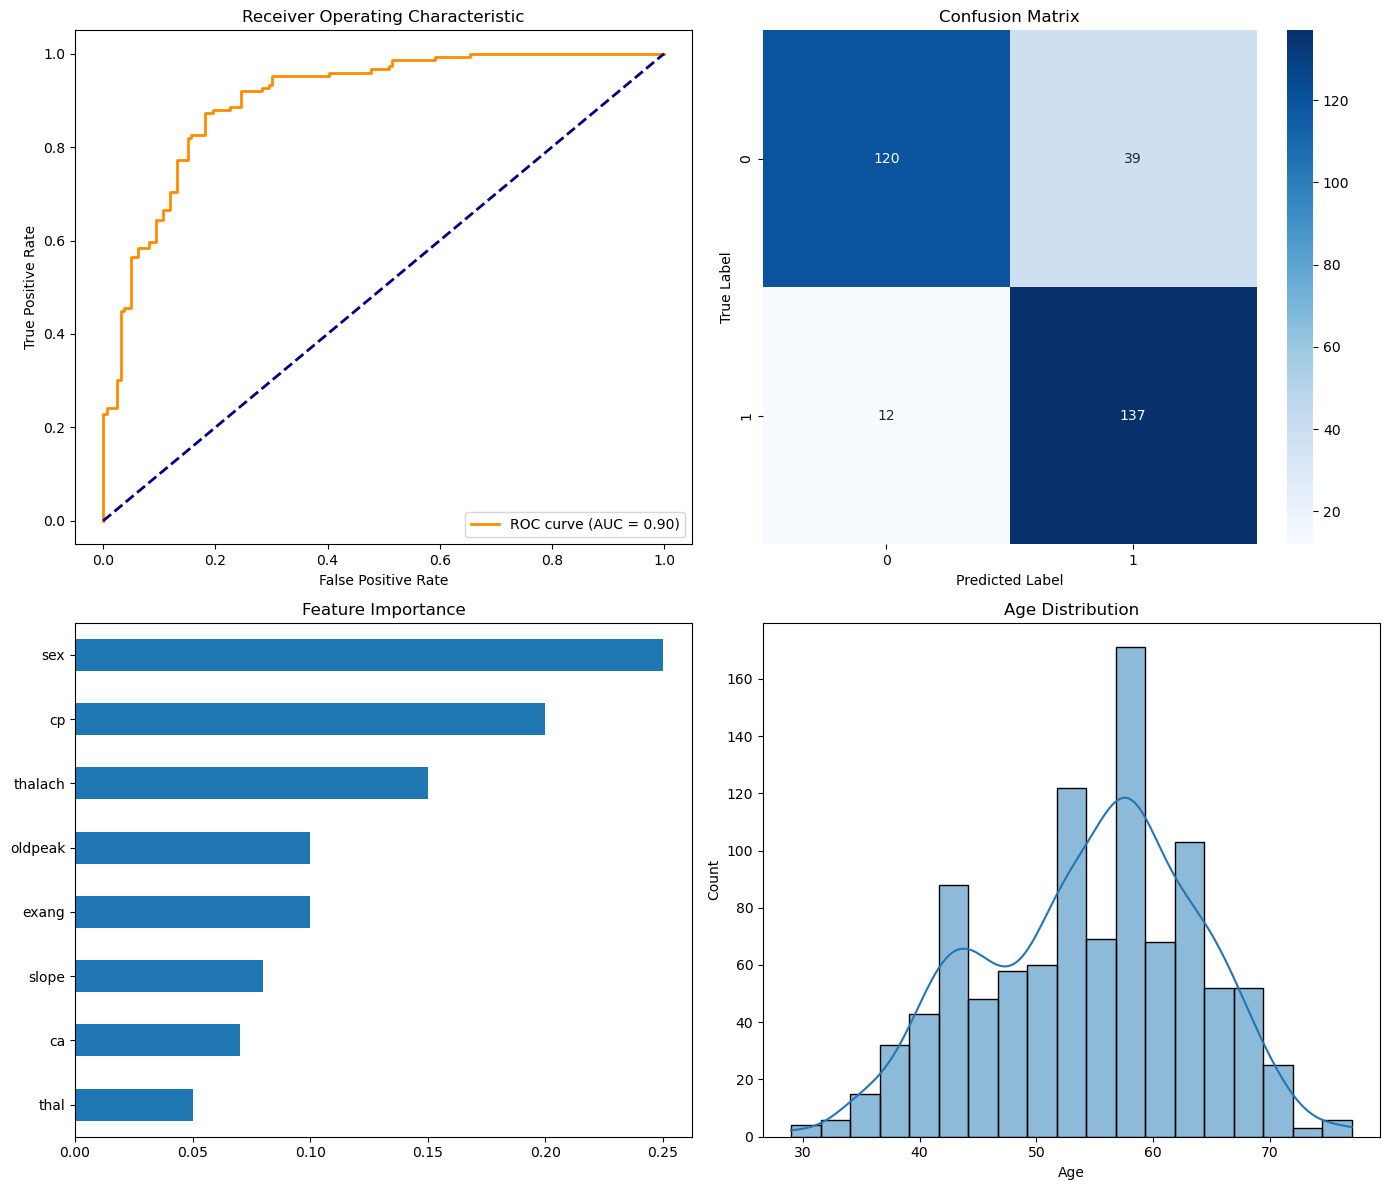

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Assume y_test, y_pred, y_prob, and selected_features are already defined

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_title('Receiver Operating Characteristic')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].legend(loc='lower right')

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=axs[0, 1],
            xticklabels=[0,1], yticklabels=[0,1])
axs[0, 1].set_title('Confusion Matrix')
axs[0, 1].set_xlabel('Predicted Label')
axs[0, 1].set_ylabel('True Label')

# 3. Feature Importance (example using RandomForest or model coefficients)
# For illustration: assume importances is a pandas Series with feature names as index
importances = pd.Series([0.25, 0.20, 0.15, 0.10, 0.10, 0.08, 0.07, 0.05], index=selected_features)
importances.sort_values().plot(kind='barh', ax=axs[1, 0])
axs[1, 0].set_title('Feature Importance')

# 4. Distribution Plot of a Key Feature (e.g., Age)
sns.histplot(data['age'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution')
axs[1, 1].set_xlabel('Age')

plt.tight_layout()
plt.show()
